# Attempt 3

### Getting the data

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from ast import literal_eval
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/micha/Desktop/FinalProject/top_repeated_climbs.csv")
difficulties_df = pd.read_csv("C:/Users/micha/Desktop/FinalProject/HoldFeature2016RightHand.csv")
df

,problem_id,url,start,mid,end,grade,user_grade,is_benchmark,repeats,problem_type,is_master,setter_id,setter_nickname,setter_firstname,setter_lastname,setter_city,setter_country,setter_profile_image_url,setter_can_share_data
0,21995,https://moonboard.com/Problems/View/21995/slowly,"[[7, 4], [4, 5]]","[[7, 7], [4, 9], [6, 12], [8, 15]]","[[6, 17]]",6B,6B+,False,37,NaN,False,4dce5d91-ba13-4e03-bace-ca7d5b81022d,redflavor,jung,HOJUN,cheongju,REPUBLIK OF KOREA,/Content/Account/Images/default-profile.png?63...,True
1,23406,https://moonboard.com/Problems/View/23406/wu-%...,"[[10, 4]]","[[9, 6], [6, 7], [7, 9], [5, 11], [6, 12], [5,...","[[4, 17]]",6B,6B+,False,36,NaN,False,ACEAB249-E995-4EC0-A4E0-C7A3AAC74652,shinya okada,shinya,okada,kyoto,JAP,/Content/Account/Images/default-profile.png?63...,True
2,20712,https://moonboard.com/Problems/View/20712/warm...,"[[10, 4]]","[[5, 6], [6, 8], [4, 9], [4, 11], [2, 12], [3,...","[[3, 17]]",6B,6B+,False,28,NaN,False,46A085A4-78F2-4D5C-82CB-97D2E29E1074,Ryan Johnson,Ryan,Johnson,Chattanooga,USA,/Content/Account/Images/default-profile.png?63...,True
3,312109,https://moonboard.com/Problems/View/312109/squ...,"[[2, 4], [3, 2]]","[[5, 8], [2, 10], [3, 12], [1, 14]]","[[6, 17]]",6B,6A+,False,21,NaN,False,66807cc9-36fa-4cdd-9fad-9f1f684d3359,Dave Scott,Dave,Scott,Rome,Italy,/Content/Account/Images/default-profile.png?63...,True
4,19928,https://moonboard.com/Problems/View/19928/high...,"[[7, 4]]","[[7, 7], [5, 9], [6, 12], [4, 15]]","[[6, 17]]",6B,NaN,False,15,NaN,False,7212FB0B-1D51-46BB-B985-E394AA8C6634,Brett Duffield,Brett,Duffield,Gillingham,UK,/Content/Account/Images/default-profile.png?63...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,348432,https://moonboard.com/Problems/View/348432/-h0t,"[[6, 3], [8, 3]]","[[8, 9], [4, 8]]","[[1, 17], [4, 17]]",8B+,NaN,False,0,NaN,False,3c927baf-7a37-4639-8746-d039da7f8ac4,Momentum Silver Street,mo,mentum,Houston,United States,/Content/Account/Images/default-profile.png?63...,True
316,348669,https://moonboard.com/Problems/View/348669/f%C...,"[[6, 3], [10, 4]]","[[9, 7], [10, 10], [7, 11], [5, 10], [2, 9], [...","[[0, 17]]",8B+,NaN,False,0,NaN,False,c4395b12-2b6d-4c84-b7d8-866d0ba232a3,gohtscho,Daniel,Schiefer,Ellwangen,Germany,/Content/Account/Images/default-profile.png?63...,True
317,348670,https://moonboard.com/Problems/View/348670/f%C...,"[[1, 2]]","[[5, 4], [2, 9], [5, 10], [8, 9], [10, 8]]","[[0, 17]]",8B+,NaN,False,0,NaN,False,c4395b12-2b6d-4c84-b7d8-866d0ba232a3,gohtscho,Daniel,Schiefer,Ellwangen,Germany,/Content/Account/Images/default-profile.png?63...,True
318,348858,https://moonboard.com/Problems/View/348858/sym...,"[[5, 4]]","[[7, 12], [5, 12]]","[[1, 17]]",8B+,NaN,False,0,NaN,False,52335328-eb2c-4780-ac77-acbda91c4952,Steph,Stephanie,Nikolic,Chapel Hill,United States,/Content/Account/Images/default-profile.png?63...,True


### Removing redundunt coluns

In [3]:
desired_columns = ['start', 'mid', 'end', 'grade']
df = df[desired_columns]
df

,start,mid,end,grade
0,"[[7, 4], [4, 5]]","[[7, 7], [4, 9], [6, 12], [8, 15]]","[[6, 17]]",6B
1,"[[10, 4]]","[[9, 6], [6, 7], [7, 9], [5, 11], [6, 12], [5,...","[[4, 17]]",6B
2,"[[10, 4]]","[[5, 6], [6, 8], [4, 9], [4, 11], [2, 12], [3,...","[[3, 17]]",6B
3,"[[2, 4], [3, 2]]","[[5, 8], [2, 10], [3, 12], [1, 14]]","[[6, 17]]",6B
4,"[[7, 4]]","[[7, 7], [5, 9], [6, 12], [4, 15]]","[[6, 17]]",6B
...,...,...,...,...
315,"[[6, 3], [8, 3]]","[[8, 9], [4, 8]]","[[1, 17], [4, 17]]",8B+
316,"[[6, 3], [10, 4]]","[[9, 7], [10, 10], [7, 11], [5, 10], [2, 9], [...","[[0, 17]]",8B+
317,"[[1, 2]]","[[5, 4], [2, 9], [5, 10], [8, 9], [10, 8]]","[[0, 17]]",8B+
318,"[[5, 4]]","[[7, 12], [5, 12]]","[[1, 17]]",8B+


### Checking for null values

In [4]:
print(df[['start', 'mid', 'end', 'grade']].isnull().sum())

start    0
mid      0
end      0
grade    0
dtype: int64


### Checking data types of the columns

In [5]:
print(df[['start', 'mid', 'end', 'grade']].dtypes)

start    object
mid      object
end      object
grade    object
dtype: object


### Creating functions to preprocess the data 

Creating a new hold sequence column with the coordinate values of each hold as integers and using a straightforward computation to fix any glaring mistakes in the holds' chronological order always assuming next hold is the one with in the closest proximity of the last.

In [6]:
def custom_sort_with_new_condition(coordinates):
    # Sort the coordinates based on the y value
    sorted_by_y = sorted(coordinates, key=lambda x: x[1])

    # Special case for the first two elements if they have the same y value
    if len(sorted_by_y) > 2 and sorted_by_y[0][1] == sorted_by_y[1][1]:
        third_x = sorted_by_y[2][0]
        sorted_by_y[:2] = sorted(sorted_by_y[:2], key=lambda x: abs(x[0] - third_x))

    # Then, sort by the x value proximity for those with the same y value
    i = 1  # Start from the second element as the first two are already sorted if needed
    while i < len(sorted_by_y) - 1:
        start_i = i
        while i < len(sorted_by_y) - 1 and sorted_by_y[i][1] == sorted_by_y[i + 1][1]:
            i += 1

        # Sort by proximity to the previous x value for items with the same y value
        if i > start_i:
            previous_x = sorted_by_y[start_i - 1][0]
            sorted_by_y[start_i:i + 1] = sorted(sorted_by_y[start_i:i + 1], key=lambda x: abs(x[0] - previous_x))

        i += 1

    return sorted_by_y

df['start'] = df['start'].apply(literal_eval)
df['mid'] = df['mid'].apply(literal_eval)
df['end'] = df['end'].apply(literal_eval)

df['combined'] = df.apply(lambda row: row['start'] + row['mid'] + row['end'], axis=1)

df['sorted_combined'] = df['combined'].apply(custom_sort_with_new_condition)

df = df.drop(['combined'],axis=1)

df

C:\Users\micha\AppData\Local\Temp\ipykernel_17048\1147426115.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start'] = df['start'].apply(literal_eval)
C:\Users\micha\AppData\Local\Temp\ipykernel_17048\1147426115.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mid'] = df['mid'].apply(literal_eval)
C:\Users\micha\AppData\Local\Temp\ipykernel_17048\1147426115.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,start,mid,end,grade,sorted_combined
0,"[[7, 4], [4, 5]]","[[7, 7], [4, 9], [6, 12], [8, 15]]","[[6, 17]]",6B,"[[7, 4], [4, 5], [7, 7], [4, 9], [6, 12], [8, ..."
1,"[[10, 4]]","[[9, 6], [6, 7], [7, 9], [5, 11], [6, 12], [5,...","[[4, 17]]",6B,"[[10, 4], [9, 6], [6, 7], [7, 9], [5, 11], [6,..."
2,"[[10, 4]]","[[5, 6], [6, 8], [4, 9], [4, 11], [2, 12], [3,...","[[3, 17]]",6B,"[[10, 4], [5, 6], [6, 8], [4, 9], [4, 11], [2,..."
3,"[[2, 4], [3, 2]]","[[5, 8], [2, 10], [3, 12], [1, 14]]","[[6, 17]]",6B,"[[3, 2], [2, 4], [5, 8], [2, 10], [3, 12], [1,..."
4,"[[7, 4]]","[[7, 7], [5, 9], [6, 12], [4, 15]]","[[6, 17]]",6B,"[[7, 4], [7, 7], [5, 9], [6, 12], [4, 15], [6,..."
...,...,...,...,...,...
315,"[[6, 3], [8, 3]]","[[8, 9], [4, 8]]","[[1, 17], [4, 17]]",8B+,"[[6, 3], [8, 3], [4, 8], [8, 9], [4, 17], [1, ..."
316,"[[6, 3], [10, 4]]","[[9, 7], [10, 10], [7, 11], [5, 10], [2, 9], [...","[[0, 17]]",8B+,"[[6, 3], [5, 4], [10, 4], [9, 7], [4, 7], [2, ..."
317,"[[1, 2]]","[[5, 4], [2, 9], [5, 10], [8, 9], [10, 8]]","[[0, 17]]",8B+,"[[1, 2], [5, 4], [10, 8], [8, 9], [2, 9], [5, ..."
318,"[[5, 4]]","[[7, 12], [5, 12]]","[[1, 17]]",8B+,"[[5, 4], [5, 12], [7, 12], [1, 17]]"


In [7]:
import numpy as np
import ast

def create_difficulty_matrix(df, difficulties_df):
    # Create mapping
    hold_difficulties = {(row['X_coord'], row['Y_coord']): row['Difficulties'] for index, row in difficulties_df.iterrows()}
    
    # Determine number of unique holds
    coord_to_index = {coord: index for index, coord in enumerate(hold_difficulties.keys())}
    
    # create the matrix
    difficulty_matrix = np.zeros((len(df), len(coord_to_index)))
    
    for index, row in df.iterrows():
        # make sure all holds use iteral eval
        all_holds = ast.literal_eval(row['sorted_combined']) if isinstance(row['sorted_combined'], str) else row['sorted_combined']
        
        for hold in all_holds:
            # make sure hold is a tuple
            hold_tuple = tuple(hold)
            if hold_tuple in hold_difficulties:
                position_index = coord_to_index[hold_tuple]
                difficulty_matrix[index, position_index] = hold_difficulties[hold_tuple]
                
    return difficulty_matrix

In [8]:
difficulty_matrix = create_difficulty_matrix(df, difficulties_df)

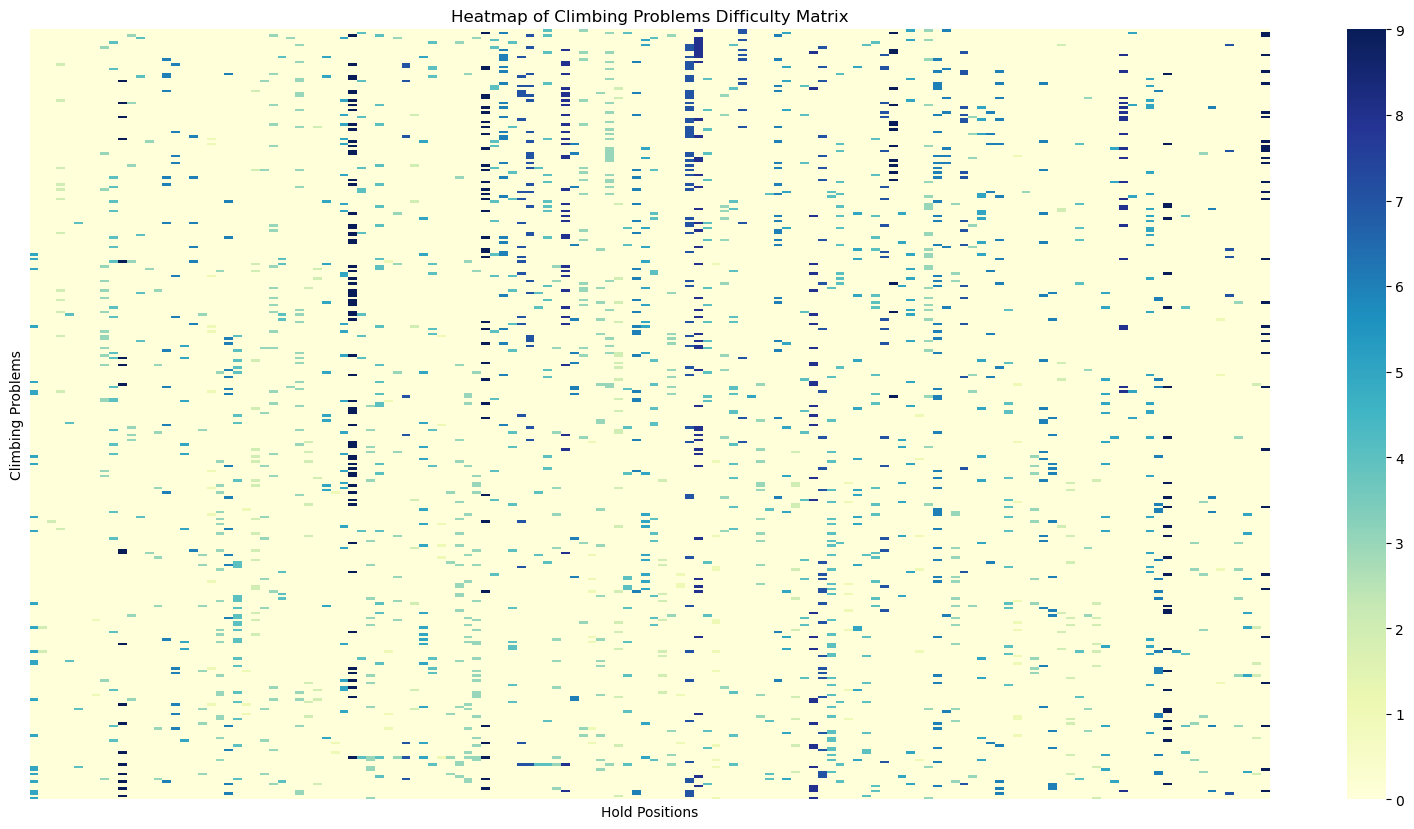

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(difficulty_matrix, cmap="YlGnBu", cbar=True, xticklabels=False, yticklabels=False)
plt.title('Heatmap of Climbing Problems Difficulty Matrix')
plt.xlabel('Hold Positions')
plt.ylabel('Climbing Problems')
plt.show()

In [10]:
import numpy as np

def calculate_aggregated_difficulties(difficulty_matrix):
    avg_difficulties = np.mean(difficulty_matrix, axis=1)
    max_difficulties = np.max(difficulty_matrix, axis=1)
    # replace zeros with nan
    min_difficulties = np.min(np.where(difficulty_matrix != 0, difficulty_matrix, np.inf), axis=1)
    non_zero_min_difficulties = min_difficulties[min_difficulties != np.inf]
    return avg_difficulties, max_difficulties, min_difficulties

In [11]:
avg_difficulties, max_difficulties, min_difficulties = calculate_aggregated_difficulties(difficulty_matrix)

Some of the non-zero minimum difficulties (excluding 0 difficulty holds):
[3. 3. 3. 3. 3. 3. 2. 3. 6. 3. 6. 4. 3. 3. 2. 4. 3. 6. 3. 4.]


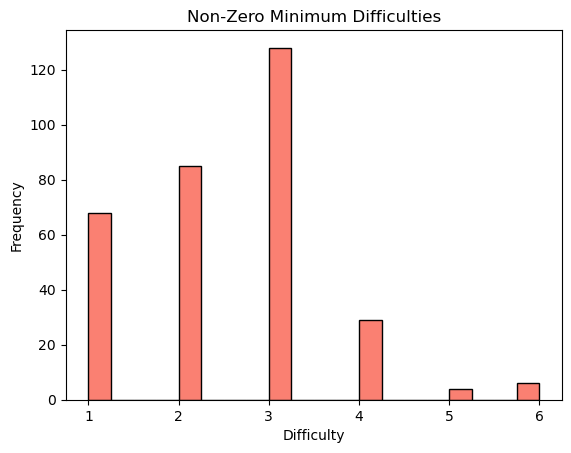

In [13]:
# try min difficulties again removing zeros
min_difficulties = np.min(np.where(difficulty_matrix != 0, difficulty_matrix, np.inf), axis=1)

#check for non zero values
non_zero_min_difficulties = min_difficulties[min_difficulties != np.inf]

print("Some of the non-zero minimum difficulties (excluding 0 difficulty holds):")
print(non_zero_min_difficulties[:20]) 

# visualise if there are no non zero values
if non_zero_min_difficulties.size > 0:
    plt.hist(non_zero_min_difficulties, bins=20, color='salmon', edgecolor='black')
    plt.title('Non-Zero Minimum Difficulties')
    plt.xlabel('Difficulty')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No non-zero minimum difficulties found.")


In [14]:
print("Some of the non-zero minimum difficulties (excluding 0 difficulty holds):")
print(non_zero_min_difficulties[:20]) 

Some of the non-zero minimum difficulties (excluding 0 difficulty holds):
[3. 3. 3. 3. 3. 3. 2. 3. 6. 3. 6. 4. 3. 3. 2. 4. 3. 6. 3. 4.]


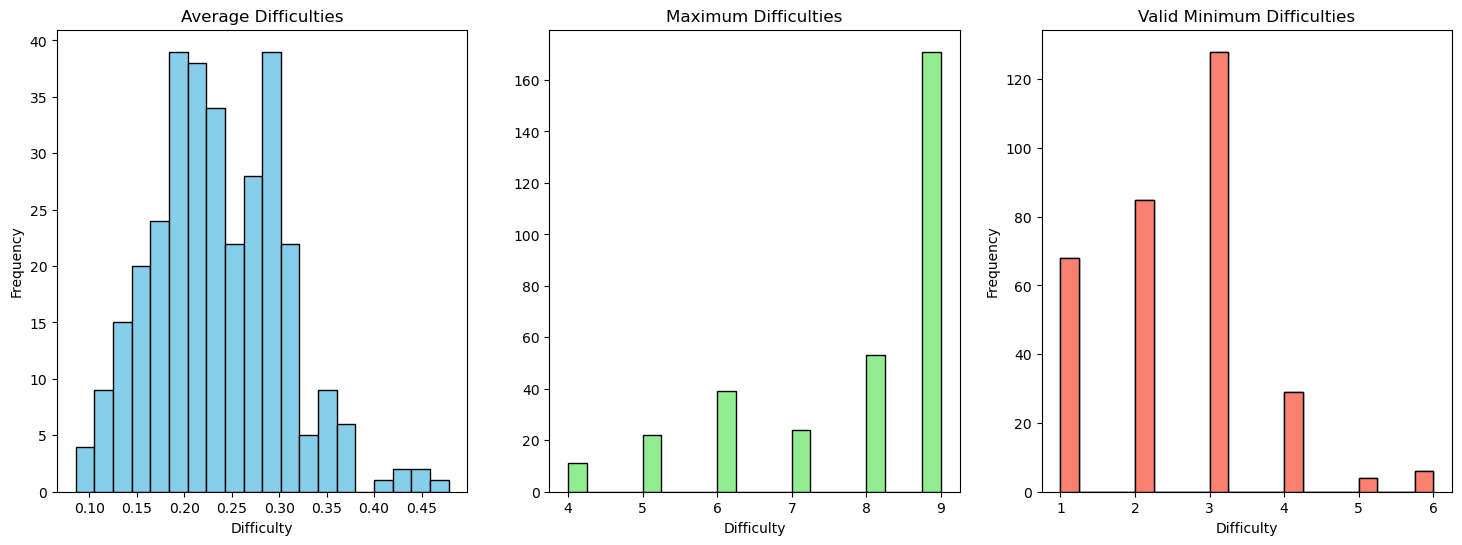

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import numpy as np


# filter zeros from min difficulty ratings
valid_min_difficulties = min_difficulties[~np.isnan(min_difficulties)]

# Setting up plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting
axes[0].hist(avg_difficulties, bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Average Difficulties')
axes[0].set_xlabel('Difficulty')
axes[0].set_ylabel('Frequency')

axes[1].hist(max_difficulties, bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Maximum Difficulties')
axes[1].set_xlabel('Difficulty')

axes[2].hist(valid_min_difficulties, bins=20, color='salmon', edgecolor='black')
axes[2].set_title('Minimum Difficulties')
axes[2].set_xlabel('Difficulty')

# error handling
valid_min_difficulties = min_difficulties[min_difficulties > 0]

if valid_min_difficulties.size == 0:
    print("No valid minimum difficulties found. Check the calculation or data.")
else:
    plt.hist(valid_min_difficulties, bins=20, color='salmon', edgecolor='black')
    plt.title('Valid Minimum Difficulties')
    plt.xlabel('Difficulty')
    plt.ylabel('Frequency')
    plt.show()


plt.tight_layout()
plt.show()

In [17]:
difficulties_df

,X_coord,Y_coord,Difficulties
0,0,17,5
1,0,15,2
2,0,14,2
3,0,13,2
4,0,12,4
...,...,...,...
135,10,8,7
136,10,7,3
137,10,6,5
138,10,5,2


In [18]:
def calculate_positional_features(df):
    avg_rows, avg_cols, num_holds = [], [], []
    for _, row in df.iterrows():
        all_holds = row['sorted_combined']
        # calculate coodinates
        rows = [hold[1] for hold in all_holds] 
        cols = [hold[0] for hold in all_holds]  
        # compute avg row, column and total number of holds
        avg_rows.append(np.mean(rows) if rows else 0)
        avg_cols.append(np.mean(cols) if cols else 0)
        num_holds.append(len(all_holds))
    return avg_rows, avg_cols, num_holds

In [19]:
avg_rows, avg_cols, num_holds = calculate_positional_features(df)

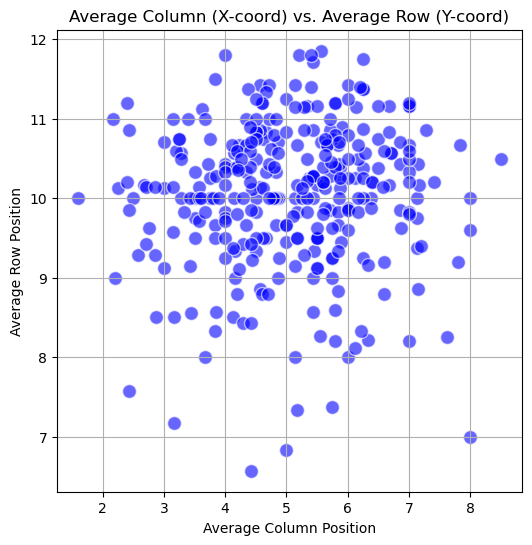

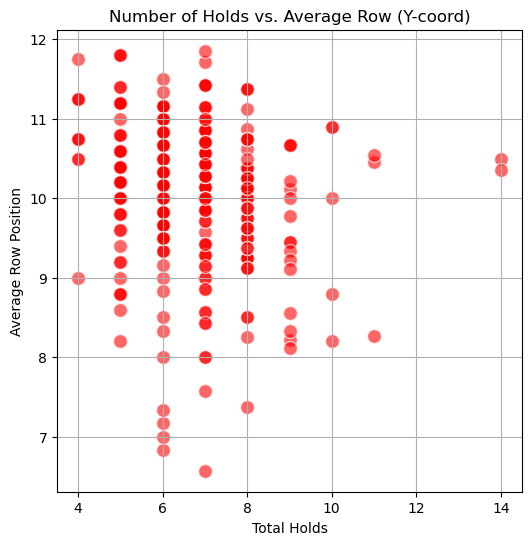

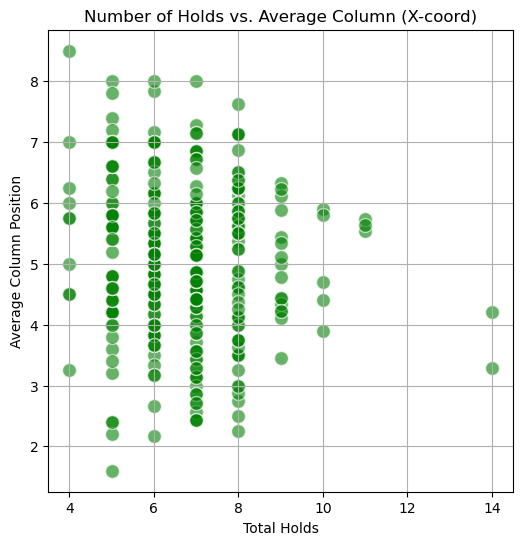

In [20]:
plt.figure(figsize=(6, 6))
plt.scatter(avg_cols, avg_rows, alpha=0.6, c='blue', edgecolors='w', s=100)
plt.title('Average Column (X-coord) vs. Average Row (Y-coord)')
plt.xlabel('Average Column Position')
plt.ylabel('Average Row Position')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(num_holds, avg_rows, alpha=0.6, c='red', edgecolors='w', s=100)
plt.title('Number of Holds vs. Average Row (Y-coord)')
plt.xlabel('Total Holds')
plt.ylabel('Average Row Position')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(num_holds, avg_cols, alpha=0.6, c='green', edgecolors='w', s=100)
plt.title('Number of Holds vs. Average Column (X-coord)')
plt.xlabel('Total Holds')
plt.ylabel('Average Column Position')
plt.grid(True)
plt.show()

### Compiling all the new features into the df

In [21]:
# Calculate difficulties features
avg_difficulties, max_difficulties, min_difficulties = calculate_aggregated_difficulties(difficulty_matrix)

# Calculate positional features
avg_rows, avg_cols, num_holds = calculate_positional_features(df)

# Add new features to df
df['avg_difficulty'] = avg_difficulties
df['max_difficulty'] = max_difficulties
df['min_difficulty'] = min_difficulties
df['avg_row'] = avg_rows
df['avg_col'] = avg_cols
df['num_holds'] = num_holds

In [22]:
df

,start,mid,end,grade,sorted_combined,avg_difficulty,max_difficulty,min_difficulty,avg_row,avg_col,num_holds
0,"[[7, 4], [4, 5]]","[[7, 7], [4, 9], [6, 12], [8, 15]]","[[6, 17]]",6B,"[[7, 4], [4, 5], [7, 7], [4, 9], [6, 12], [8, ...",0.257143,8.0,3.0,9.857143,6.000000,7
1,"[[10, 4]]","[[9, 6], [6, 7], [7, 9], [5, 11], [6, 12], [5,...","[[4, 17]]",6B,"[[10, 4], [9, 6], [6, 7], [7, 9], [5, 11], [6,...",0.435714,9.0,3.0,10.900000,5.900000,10
2,"[[10, 4]]","[[5, 6], [6, 8], [4, 9], [4, 11], [2, 12], [3,...","[[3, 17]]",6B,"[[10, 4], [5, 6], [6, 8], [4, 9], [4, 11], [2,...",0.342857,9.0,3.0,10.666667,4.222222,9
3,"[[2, 4], [3, 2]]","[[5, 8], [2, 10], [3, 12], [1, 14]]","[[6, 17]]",6B,"[[3, 2], [2, 4], [5, 8], [2, 10], [3, 12], [1,...",0.214286,8.0,3.0,9.571429,3.142857,7
4,"[[7, 4]]","[[7, 7], [5, 9], [6, 12], [4, 15]]","[[6, 17]]",6B,"[[7, 4], [7, 7], [5, 9], [6, 12], [4, 15], [6,...",0.228571,8.0,3.0,10.666667,5.833333,6
...,...,...,...,...,...,...,...,...,...,...,...
315,"[[6, 3], [8, 3]]","[[8, 9], [4, 8]]","[[1, 17], [4, 17]]",8B+,"[[6, 3], [8, 3], [4, 8], [8, 9], [4, 17], [1, ...",0.292857,9.0,3.0,9.500000,5.166667,6
316,"[[6, 3], [10, 4]]","[[9, 7], [10, 10], [7, 11], [5, 10], [2, 9], [...","[[0, 17]]",8B+,"[[6, 3], [5, 4], [10, 4], [9, 7], [4, 7], [2, ...",0.457143,9.0,3.0,8.200000,5.800000,10
317,"[[1, 2]]","[[5, 4], [2, 9], [5, 10], [8, 9], [10, 8]]","[[0, 17]]",8B+,"[[1, 2], [5, 4], [10, 8], [8, 9], [2, 9], [5, ...",0.285714,7.0,3.0,8.428571,4.428571,7
318,"[[5, 4]]","[[7, 12], [5, 12]]","[[1, 17]]",8B+,"[[5, 4], [5, 12], [7, 12], [1, 17]]",0.157143,9.0,2.0,11.250000,4.500000,4


In [23]:
import pandas as pd

# mapping grades to groups
def map_grade_to_group(grade):
    if grade in ['6B', '6B+', '6C', '6C+']:
        return 0
    elif grade in ['7A', '7A+', '7B', '7B+']:
        return 1
    elif grade in ['7C', '7C+', '8A', '8A+']:
        return 2
    elif grade in ['8B', '8B+']:
        return 3
    else:
        return None

# new column for groups
df['grade_group'] = df['grade'].apply(map_grade_to_group)

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

df_features = df.drop(['grade', 'start', 'mid', 'end', 'sorted_combined', 'grade_group'], axis=1)

# make difficulty matrix into a df
if not isinstance(difficulty_matrix, pd.DataFrame):
    difficulty_df = pd.DataFrame(difficulty_matrix)
else:
    difficulty_df = difficulty_matrix

combined_features = pd.concat([df_features.reset_index(drop=True), difficulty_df.reset_index(drop=True)], axis=1)

In [26]:
y = df['grade_group']

X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
X_train.head

<bound method NDFrame.head of      avg_difficulty  max_difficulty  min_difficulty    avg_row   avg_col  \
97         0.250000             8.0             1.0  10.750000  3.750000   
225        0.214286             9.0             4.0  10.400000  5.800000   
205        0.128571             5.0             1.0   9.800000  4.200000   
133        0.164286             6.0             3.0  10.400000  4.000000   
43         0.292857             9.0             3.0  10.571429  6.714286   
..              ...             ...             ...        ...       ...   
72         0.285714             9.0             2.0  10.000000  6.250000   
266        0.164286             9.0             1.0   9.428571  4.428571   
53         0.364286             9.0             3.0  10.000000  6.375000   
31         0.328571             9.0             3.0   9.125000  5.500000   
196        0.121429             5.0             1.0  10.333333  7.000000   

     num_holds    0    1    2    3  ...  130  131  132  1

### XGBoost 

In [28]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), seed=42, use_label_encoder=False, eval_metric='mlogloss')

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

C:\Users\micha\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy on test data: 0.546875

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.69      0.73        16
           1       0.50      0.63      0.56        19
           2       0.59      0.53      0.56        19
           3       0.22      0.20      0.21        10

    accuracy                           0.55        64
   macro avg       0.52      0.51      0.51        64
weighted avg       0.55      0.55      0.55        64



### checking for class imbalances

In [29]:
class_counts = df['grade_group'].value_counts()
print(class_counts)

grade_group
1    96
2    96
0    80
3    48
Name: count, dtype: int64


### adjusting class weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

weight_dict = dict(zip(np.unique(y_train), class_weights))

sample_weights = y_train.map(weight_dict)

xgb_clf.fit(X_train, y_train, sample_weight=sample_weights)

In [ ]:
class_counts = df['grade_group'].value_counts()
print(class_counts)

In [ ]:
y_pred = xgb_clf.predict(X_test)
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

### hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

In [ ]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), use_label_encoder=False, eval_metric='mlogloss', seed=42)

grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best score achieved: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Accuracy on test data: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

the accuracy on the test data and the cross validation score is similar suggesting it generalises reasonably well and is not overfitting significantly.

there a notable variance in performance across classes. ckass 3 has perfect precision but low recall suggesting the model is rarely predicting class 3 but is very accurate when it does. this could potentially suggest class imbalance or the model is struggling to generalise to this class.
class 0 and 2 have better recall indicating a more balanced performance.

### Using RandomUnderSampler to undersample the majority class

In [ ]:
X_train.columns = X_train.columns.astype(str)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score, cross_validate
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
xgb_clf_rus = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y_train_rus)), seed=42, use_label_encoder=False, eval_metric='mlogloss')

cv_scores = cross_val_score(xgb_clf_rus, X_train_rus, y_train_rus, cv=5, scoring='accuracy')

print(f"RandomUnderSampler XGBoost CV Average Score: {cv_scores.mean():.2f}")
print(f"All XGBoost CV Scores: {cv_scores}")

In [ ]:
xgb_clf_rus.fit(X_train_rus, y_train_rus)

y_pred_rus = xgb_clf_rus.predict(X_test)
print("Accuracy on test data:", accuracy_score(y_test, y_pred_rus))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rus))

using class weights resulted in better overall accuracy compared to RUS.
class 0 performs better with class weights with better precision and recall.
class 1 had similar performance for both methods of tackling class imbalance with a marginal improvement in precision and recall using RUS.
class 2 had a higher precision and recall with class weights.
class 3 the smallest and most challenging class showed significant improvement in recall with RUS indicating indersampling helped recognise the minority class better at the cose of lower precision.

#### Tuning the model again based on the results of the last grid search(couldnt run took too long)

In [ ]:
# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.01, 0.025, 0.05],
#     'n_estimators': [50, 100, 150],
#     'gamma': [0.1, 0.2, 0.3],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.8, 0.9, 1],
#     'min_child_weight': [1, 2, 3]
# }
# xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), use_label_encoder=False, eval_metric='mlogloss', seed=42)

# grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# grid_search.fit(X_train, y_train)

In [ ]:
# print("Best parameters found: ", grid_search.best_params_)
# print("Best score achieved: ", grid_search.best_score_)

# best_model = grid_search.best_estimator_


# y_pred = best_model.predict(X_test)
# print("Accuracy on test data: ", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

### applying some cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [ ]:
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax',
    colsample_bytree=0.9,
    gamma=0.2,
    learning_rate=0.01,
    max_depth=4,
    n_estimators=100,
    subsample=0.8,
    num_class=len(y.unique()),
    use_label_encoder=False,
    eval_metric='mlogloss',
    seed=42
)

In [ ]:
X = combined_features  
y = df['grade_group']  

cv_scores = cross_val_score(xgb_clf, X, y, cv=5, scoring='accuracy', n_jobs=-1)

print("CV Scores for each fold:", cv_scores)

#mean CV score
print("Mean CV Score:", cv_scores.mean())

### Trying SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

rf_clf = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print("Cross-validated accuracy scores:", cv_scores)
print("Average CV accuracy:", cv_scores.mean())
print("\nAccuracy on test data:", accuracy_score(y_test, y_pred))
print("\nClassification Report on test data:\n", classification_report(y_test, y_pred))

In [ ]:
# feature names and their data types
print(X_train.dtypes)

In [ ]:
X_train.shape

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

rf_clf = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')

rf_clf.fit(X_train, y_train)

print("Cross-validated accuracy scores on training set:", cv_scores)
print("Average CV accuracy on training set:", cv_scores.mean())

In [ ]:
y_pred = rf_clf.predict(X_test)

print("\nAccuracy on test data:", accuracy_score(y_test, y_pred))
print("\nClassification Report on test data:\n", classification_report(y_test, y_pred))

In [ ]:
X_train.head

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

knn_clf = KNeighborsClassifier()

cv_scores = cross_val_score(knn_clf, X_train, y_train, cv=5, scoring='accuracy')

knn_clf.fit(X_train, y_train)

print("Cross-validated accuracy scores on training set:", cv_scores)
print("Average CV accuracy on training set:", cv_scores.mean())

In [ ]:
import numpy as np

X_train_contiguous = np.ascontiguousarray(X_train)
X_test_contiguous = np.ascontiguousarray(X_test)

knn_clf = KNeighborsClassifier()

cv_scores = cross_val_score(knn_clf, X_train_contiguous, y_train, cv=5, scoring='accuracy')

knn_clf.fit(X_train_contiguous, y_train)

print("Cross-validated accuracy scores on training set:", cv_scores)
print("Average CV accuracy on training set:", cv_scores.mean())

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = knn_clf.predict(X_test_contiguous)

test_accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

print("Accuracy on test data:", test_accuracy)
print("\nClassification Report on test data:\n", class_report)

### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm_clf = SVC(random_state=42)

cv_scores = cross_val_score(svm_clf, X_train, y_train, cv=5, scoring='accuracy')

svm_clf.fit(X_train, y_train)

print("Cross-validated accuracy scores on training set:", cv_scores)
print("Average CV accuracy on training set:", cv_scores.mean())

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = svm_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

print("Accuracy on test data:", test_accuracy)
print("\nClassification Report on test data:\n", class_report)

# Maybe try stacking classifiers or blending or voting